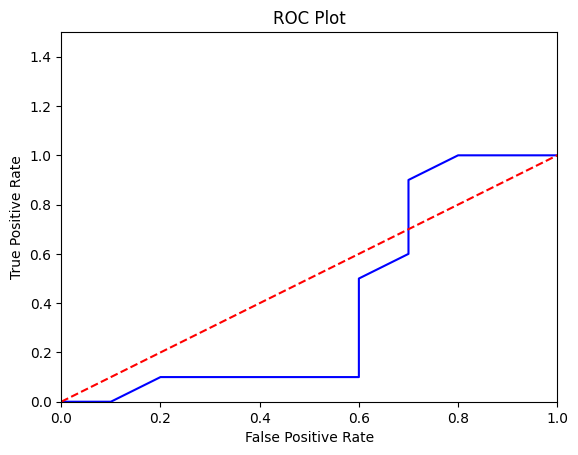

In [1]:
from sklearn import metrics
import numpy as n
import matplotlib.pyplot as plt
score = n.array([0.85, 0.3, 0.35, 0.6, 0.55, 0.65, 0.4, 0.5, 0.45, 0.55, 0.75, 0.85, 0.75, 0.15, 0.2, 0.5, 0.9, 0.8, 0.8, 0.3])
prob = n.array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])
fpr, tpr, thshd = metrics.roc_curve(prob, score)
plt.plot(
    fpr, tpr, 
    color="blue")
plt.plot([0, 1], [0, 1], color="red", linestyle="--")
plt.ylim([0.0, 1.5])
plt.xlim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Plot")
plt.show()

In [1]:
import torch
import torchvision ## Contains some utilities for working with the image data
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt
import torchvision.transforms as transforms
from torch.utils.data import random_split
from torch.utils.data import DataLoader
import torch.nn.functional as F

In [2]:
 dataset = MNIST(root = 'data/', download = True)
 print(len(dataset))

100.0%
100.0%
100.0%
100.0%

60000


In [3]:
 mnist_dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())
 print(mnist_dataset)

Dataset MNIST
    Number of datapoints: 60000
    Root location: data/
    Split: Train
    StandardTransform
Transform: ToTensor()


shape:  torch.Size([1, 28, 28])
Label:  5


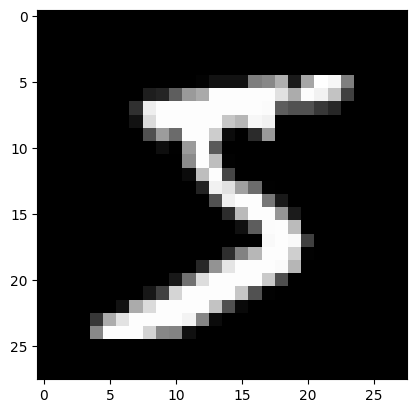

In [16]:
 img, label = mnist_dataset[0]
 plt.imshow(img[0], cmap = 'gray')
 print("shape: ", img.shape)
 print('Label: ', label)

In [17]:
image_tensor, label = mnist_dataset[0]
print(image_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [18]:
 print(image_tensor[:,10:15,10:15])
 print(torch.max(image_tensor), torch.min(image_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


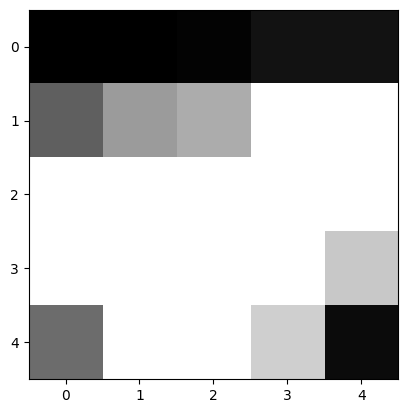

In [20]:
plt.imshow(image_tensor[0,5:10,10:15],cmap = 'gray')

In [21]:
train_data, validation_data = random_split(mnist_dataset, [50000, 10000])
 ## Print the length of both train and validation datasets below
print("length of Train Datasets: ", len(train_data))
print("length of Validation Datasets: ", len(validation_data))

length of Train Datasets:  50000
length of Validation Datasets:  10000


In [22]:
batch_size = 128
train_loader = DataLoader(train_data, batch_size, shuffle = True)
val_loader = DataLoader(validation_data, batch_size, shuffle = False)

In [23]:
import torch.nn as nn
input_size = 28 * 28
num_classes = 10
 ## using logistic regression  below as our model here
model = nn.Linear(input_size, num_classes)
print(model.weight.shape)
print(model.weight)
print(model.bias.shape)
print(model.bias)

torch.Size([10, 784])
Parameter containing:
tensor([[-0.0256, -0.0102,  0.0276,  ...,  0.0043, -0.0281, -0.0027],
        [-0.0051,  0.0173,  0.0312,  ...,  0.0225,  0.0318, -0.0264],
        [ 0.0335, -0.0325, -0.0271,  ...,  0.0285, -0.0299, -0.0284],
        ...,
        [-0.0218, -0.0267,  0.0251,  ..., -0.0345, -0.0037, -0.0093],
        [ 0.0323,  0.0111, -0.0351,  ...,  0.0293,  0.0181,  0.0164],
        [ 0.0291,  0.0126,  0.0209,  ..., -0.0139,  0.0055, -0.0055]],
       requires_grad=True)
torch.Size([10])
Parameter containing:
tensor([-0.0121, -0.0298, -0.0350, -0.0339,  0.0096,  0.0223, -0.0208, -0.0092,
        -0.0104, -0.0064], requires_grad=True)
